In [75]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import t
#import sympy as sym
from scipy.special import erf
plt.rcParams['font.family']='serif'

In [123]:
Npixeles=256
NI=1 #Número de imágenes RAW
NF=1 #Número de imágenes FF
NThr=1 #Número de imágenes contenidas dentro de cada .raw: La primera es la dada por el canal 0 y la segunda es la dada por el canal 1.
nameRAW="vis6M__d0.1m_a15um_p62um_step-4.2_dith23.25_"
nameFF="Spk_YES2FF_Poly_00_d0.1m_a15um_p62um_step-4.2_dith23.25_"

In [124]:
def ImagenesR(name,Npixeles):
    I=[]
    for k in range(0,len(name),Npixeles*Npixeles):
        Im=np.zeros((Npixeles,Npixeles))
        for j in range(Npixeles):
            for i in range(Npixeles):
                Im[j,i]=name[i+Npixeles*j+k]
        I.append(Im)
    return I
def Imagenes(name,Npixeles,NI):
    D=[]
    for i in range(1,NI+1):
        Raw=np.fromfile(name+"{}.raw".format(i), dtype='float32')
        K=ImagenesR(Raw,Npixeles)
        D.append(K)
    return D
def ImagenesA(name,Npixeles,NI,NThr):
    A=[]
    for i in range(NThr):
        Mean=np.zeros((Npixeles, Npixeles))
        for j in range (NI):
            Mean=Mean+name[j][i]
        A.append(Mean)
    return A
def CNR(meanS,meanB,stdB):
    CNR = (meanB - meanS)/stdB
    return CNR

In [125]:
RAW=Imagenes(nameRAW,Npixeles,NI)
RAWA=ImagenesA(RAW,Npixeles,NI,NThr)
FF=Imagenes(nameFF,Npixeles,NF)
FFA=ImagenesA(FF,Npixeles,NF,NThr)

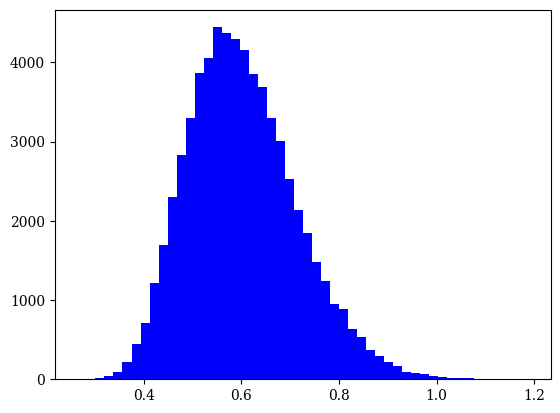

In [126]:
RAWC=[]
RAWCN=[]
for i in range(NThr):
    RawC=RAWA[i]/FFA[i]
    RawCN=(RawC)#-0.99)*100
    RAWC.append(RawC)
    RAWCN.append(RawCN)
k=0
ImG=plt.hist(np.ravel(RAWCN[k]),bins=50,color="blue")

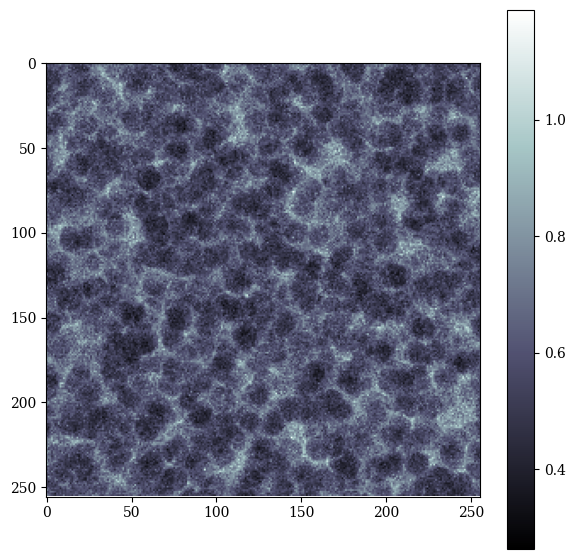

In [127]:
plt.figure(figsize=(7,7))
plt.imshow(RAWCN[k], cmap="bone")
plt.colorbar()

In [128]:

mean = np.mean(RAWCN[k][10:70,10:70])
std = np.std(RAWCN[k][10:70,10:70])
Vis = std/(mean) *100
Vis,std,mean


(17.33630885415479, 0.10605411553144008, 0.6117456514165837)

In [137]:
Mag = np.array([1.07,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6])
vis = np.array([16.79,19.051,19.866,19.42,19.288,18.93,18.62,18.29, 18.16,17.98,17.33])

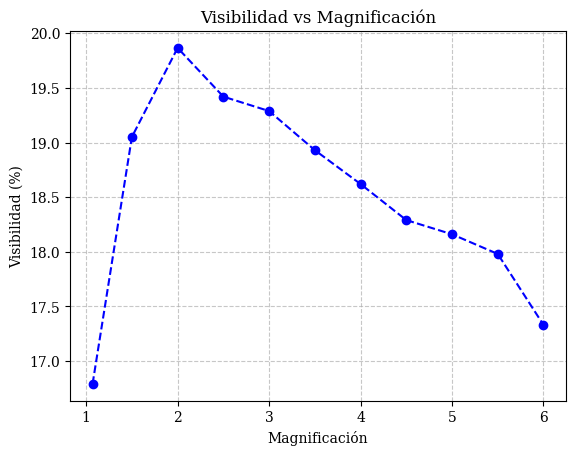

In [142]:
plt.plot(Mag, vis, "o", color="blue")
plt.plot(Mag, vis, "--", color="blue")
plt.xlabel("Magnificación")
plt.ylabel("Visibilidad (%)")
plt.title("Visibilidad vs Magnificación")
plt.grid(linestyle="--",alpha=0.7)
plt.show()
